In [ ]:
from random import random
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1234
)


## Decision Tree

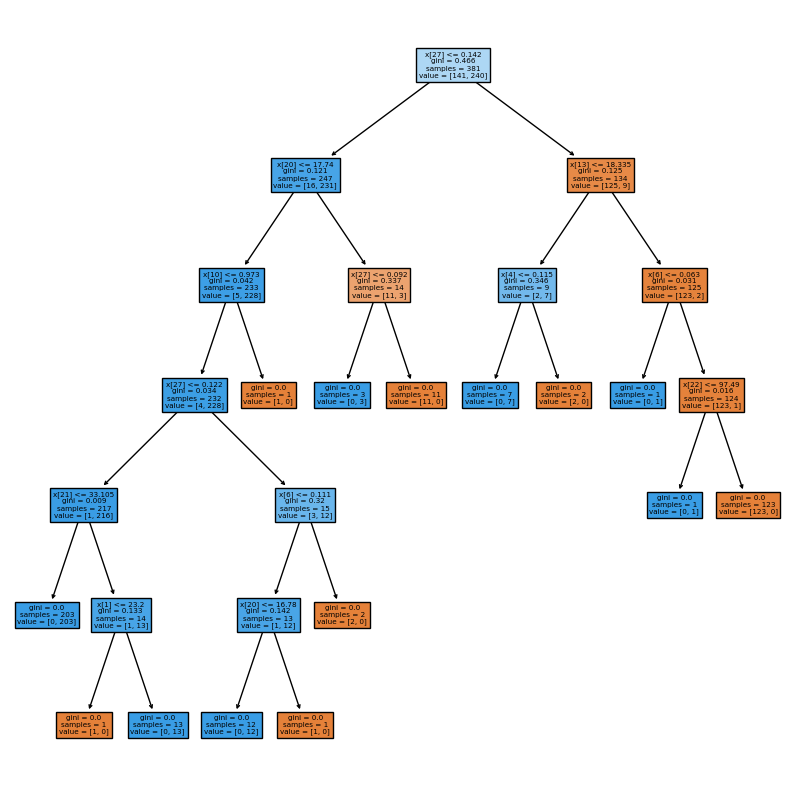

In [ ]:
# Define the model as a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the model
clf.fit(X_train,y_train)

# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
# Obtain the model's predictions on the test dataset
y_pred = clf.predict(X_test)

#accuracy
accuracy(y_test, y_pred)

0.8670212765957447

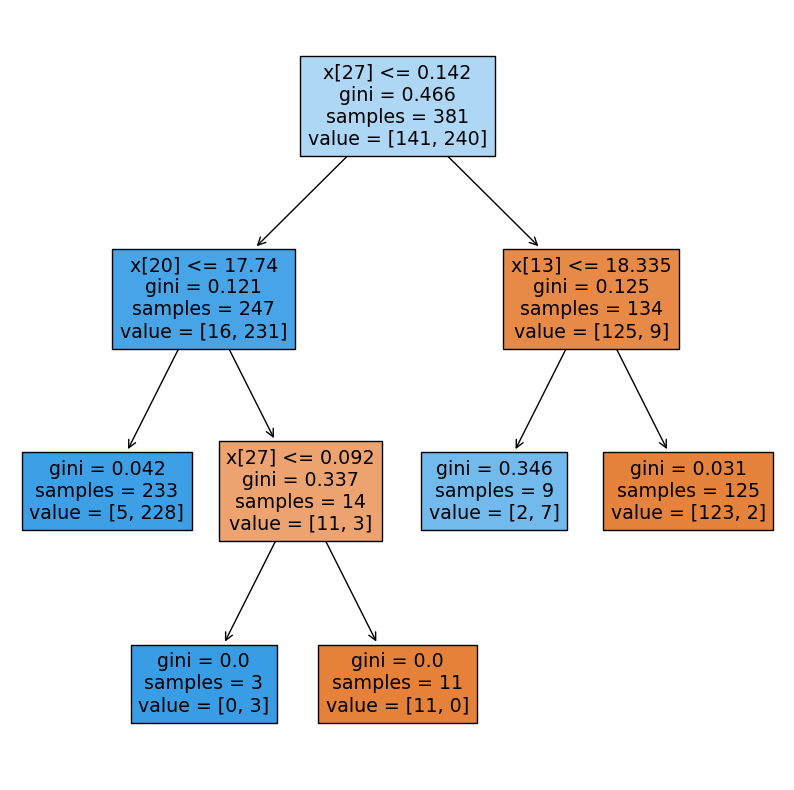

In [ ]:
# Define the model as a decision tree classifier with pruning in order to avoid overfitting
# The value of 0.001 for the pruning seems like a good spot for this particular model
clf = tree.DecisionTreeClassifier(ccp_alpha=0.01)

# Train the model
clf.fit(X_train,y_train)

# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
# Obtain the model's predictions on the test dataset
y_pred = clf.predict(X_test)

#accuracy
accuracy(y_test, y_pred)

0.9042553191489362

## Random Forest

In [ ]:
# Initialize the model as a random forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train,y_train)

# Obtain the model's predictions on the test dataset
y_pred = clf.predict(X_test)

#accuracy
accuracy(y_test, y_pred)

0.9308510638297872

In [ ]:
c     = [0.1,1,10,100]
gamma = [1,10,100,1000]

In [ ]:

# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'oob_score':[True],
    'max_depth': [30,50,80],
    'max_features': [2,8,16],
    'min_samples_leaf': [2, 8, 16],
    'min_samples_split': [4,8, 16],
    'n_estimators': [20,30,64,100],
    'ccp_alpha':[0.0001,.001]
}

In [ ]:
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


{'bootstrap': True,
 'ccp_alpha': 0.0001,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 20,
 'oob_score': True}

In [ ]:
#from sklearn.metrics import confusion_matrix, classification_report

best_grid = grid_search.best_estimator_

y_pred=best_grid.predict(X_test)

#accuracy
accuracy(y_test, y_pred)

0.9361702127659575

In [ ]:
print("out of bag error: ", 1 - best_grid.oob_score_)
print("out of bag score: ",best_grid.oob_score_)

out of bag error:  0.044619422572178435
out of bag score:  0.9553805774278216
